## The necessary libraries are imported

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, root_mean_squared_error

## All six relational datasets have been successfully imported from their respective CSV files.

In [2]:
classroom_table = pd.read_csv("classroom_table.csv")
extra_activity = pd.read_csv("extracurricular_activity.csv")
parent_table = pd.read_csv("parent_table.csv")
results_table = pd.read_csv("results_table.csv")
student_table = pd.read_csv("student_table.csv")
waec_table = pd.read_csv("waec_results_table.csv")

## Each dataset is carefully inspected for data types & missing values

In [3]:
waec_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   WAECID             185 non-null    int64  
 1   MockId             185 non-null    int64  
 2   WAEC_Maths         99 non-null     object 
 3   WAEC_English       99 non-null     object 
 4   WAEC_Civic         99 non-null     object 
 5   WAEC_Electronics   99 non-null     object 
 6   WAEC_Economics     99 non-null     object 
 7   WAEC_Biology       50 non-null     object 
 8   WAEC_Physics       50 non-null     object 
 9   WAEC_Chemistry     50 non-null     object 
 10  WAEC_Geography     50 non-null     object 
 11  WAEC_Accounting    49 non-null     object 
 12  WAEC_Commerce      49 non-null     object 
 13  WAEC_Government    49 non-null     object 
 14  WAEC_Book Keeping  49 non-null     object 
 15  Jamb               99 non-null     float64
dtypes: float64(1), int64(2), o

In [4]:
waec_table.isna().sum()

WAECID                 0
MockId                 0
WAEC_Maths            86
WAEC_English          86
WAEC_Civic            86
WAEC_Electronics      86
WAEC_Economics        86
WAEC_Biology         135
WAEC_Physics         135
WAEC_Chemistry       135
WAEC_Geography       135
WAEC_Accounting      136
WAEC_Commerce        136
WAEC_Government      136
WAEC_Book Keeping    136
Jamb                  86
dtype: int64

In [5]:
print(f"These are the unique values for WAEC_Maths {waec_table['WAEC_Maths'].unique()}")
print(f"These are the unique values for WAEC_English {waec_table['WAEC_English'].unique()}")
print(f"These are the unique values for WAEC_Civic {waec_table['WAEC_Civic'].unique()}")
print(f"These are the unique values for WAEC_Electronics {waec_table['WAEC_Electronics'].unique()}")
print(f"These are the unique values for WAEC_Economics {waec_table['WAEC_Economics'].unique()}")
print(f"These are the unique values for WAEC_Biology {waec_table['WAEC_Biology'].unique()}")
print(f"These are the unique values for WAEC_Physics {waec_table['WAEC_Physics'].unique()}")
print(f"These are the unique values for WAEC_Chemistry {waec_table['WAEC_Chemistry'].unique()}")
print(f"These are the unique values for WAEC_Geography {waec_table['WAEC_Geography'].unique()}")
print(f"These are the unique values for WAEC_Accounting {waec_table['WAEC_Accounting'].unique()}")
print(f"These are the unique values for WAEC_Commerce {waec_table['WAEC_Commerce'].unique()}")
print(f"These are the unique values for WAEC_Government {waec_table['WAEC_Government'].unique()}")
print(f"These are the unique values for WAEC_Book Keeping {waec_table['WAEC_Book Keeping'].unique()}")
print(f"These are the unique values for Jamb {waec_table['Jamb'].unique()}")

These are the unique values for WAEC_Maths [nan 'C6' 'C4' 'B2' 'B3' 'A1' 'C5' 'E8']
These are the unique values for WAEC_English [nan 'C4' 'B3' 'C6' 'B2' 'E8' 'A1' 'C5' 'D7' 'F9']
These are the unique values for WAEC_Civic [nan 'C5' 'B2' 'A1' 'C6' 'C4' 'D7' 'B3']
These are the unique values for WAEC_Electronics [nan 'B3' 'B2' 'A1' 'C6' 'C4' 'D7' 'F9' 'C5']
These are the unique values for WAEC_Economics [nan 'B3' 'A1' 'C4' 'C5' 'B2' 'D7' 'C6']
These are the unique values for WAEC_Biology [nan 'B3' 'B2' 'C4' 'D7' 'A1' 'E8' 'C5' 'C6']
These are the unique values for WAEC_Physics [nan 'C6' 'B2' 'A1' 'D7' 'B3' 'C4' 'C5' 'E8']
These are the unique values for WAEC_Chemistry [nan 'B3' 'C5' 'A1' 'C4' 'D7' 'C6' 'B2' 'F9' 'E8']
These are the unique values for WAEC_Geography [nan 'C6' 'B3' 'C4' 'C5' 'B2' 'A1' 'F9' 'D7']
These are the unique values for WAEC_Accounting [nan 'C6' 'B3' 'C5' 'A1' 'E8' 'B2' 'C4']
These are the unique values for WAEC_Commerce [nan 'C6' 'A1' 'C5' 'C4' 'B2' 'B3' 'D7']
Thes

In [6]:
classroom_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Classroom_id    4 non-null      int64 
 1   Classroom_type  4 non-null      object
 2   Classroom_year  4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 228.0+ bytes


In [7]:
classroom_table.isna().sum()

Classroom_id      0
Classroom_type    0
Classroom_year    0
dtype: int64

In [8]:
extra_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ExtraCurricularActivityId  3 non-null      int64 
 1   ExtraCurricularActivity    3 non-null      object
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


In [9]:
extra_activity.isna().sum()

ExtraCurricularActivityId    0
ExtraCurricularActivity      0
dtype: int64

In [10]:
parent_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Parent_id               185 non-null    int64 
 1   SupportingParent        185 non-null    object
 2   HighestParentEducation  185 non-null    object
 3   Family_Size             185 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.9+ KB


In [11]:
parent_table.isna().sum()

Parent_id                 0
SupportingParent          0
HighestParentEducation    0
Family_Size               0
dtype: int64

In [12]:
results_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MockId        185 non-null    int64 
 1   StudentID     185 non-null    int64 
 2   Maths         185 non-null    object
 3   English       185 non-null    object
 4   Civic         185 non-null    object
 5   Electronics   185 non-null    object
 6   Economics     185 non-null    object
 7   Biology       99 non-null     object
 8   Physics       99 non-null     object
 9   Chemistry     99 non-null     object
 10  Geography     99 non-null     object
 11  Accounting    86 non-null     object
 12  Commerce      86 non-null     object
 13  Government    86 non-null     object
 14  Book Keeping  86 non-null     object
dtypes: int64(2), object(13)
memory usage: 21.8+ KB


In [13]:
results_table.isna().sum()

MockId           0
StudentID        0
Maths            0
English          0
Civic            0
Electronics      0
Economics        0
Biology         86
Physics         86
Chemistry       86
Geography       86
Accounting      99
Commerce        99
Government      99
Book Keeping    99
dtype: int64

In [14]:
print(f"These are the unique values for Biology {results_table['Biology'].unique()}")
print(f"These are the unique values for Physics {results_table['Physics'].unique()}")
print(f"These are the unique values for Chemistry {results_table['Chemistry'].unique()}")
print(f"These are the unique values for Geography {results_table['Geography'].unique()}")
print(f"These are the unique values for Accounting {results_table['Accounting'].unique()}")
print(f"These are the unique values for Commerce {results_table['Commerce'].unique()}")
print(f"These are the unique values for Government {results_table['Government'].unique()}")
print(f"These are the unique values for Book Keeping {results_table['Book Keeping'].unique()}")

These are the unique values for Biology ['C6' 'C5' nan 'C4' 'B3' 'B2' 'D7' 'A1']
These are the unique values for Physics ['B3' 'C5' nan 'C6' 'B2' 'C4' 'D7' 'A1']
These are the unique values for Chemistry ['C5' 'C4' nan 'C6' 'D7' 'B3' 'B2' 'A1']
These are the unique values for Geography ['B3' 'C5' nan 'B2' 'C4' 'C6' 'D7' 'A1']
These are the unique values for Accounting [nan 'C5' 'B3' 'C6' 'C4' 'A1' 'B2' 'D7']
These are the unique values for Commerce [nan 'C4' 'C5' 'C6' 'A1' 'B3' 'B2' 'D7']
These are the unique values for Government [nan 'C4' 'B2' 'C6' 'B3' 'A1' 'D7' 'C5']
These are the unique values for Book Keeping [nan 'B3' 'C5' 'C6' 'C4' 'A1' 'B2' 'D7']


In [15]:
student_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  185 non-null    int64  
 1   name                       185 non-null    object 
 2   gender                     185 non-null    object 
 3   phone                      185 non-null    float64
 4   Classroom_id               185 non-null    int64  
 5   Age                        185 non-null    float64
 6   Parent_id                  185 non-null    int64  
 7   ExtraCurricularActivityId  185 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 11.7+ KB


In [16]:
student_table.isna().sum()

StudentID                    0
name                         0
gender                       0
phone                        0
Classroom_id                 0
Age                          0
Parent_id                    0
ExtraCurricularActivityId    0
dtype: int64

# Handling Missing Results in WAEC
WAEC_IDs 100 - 185 have empty data because these candidates have registered for WAEC but are yet to write.
These IDs will be labelled with **"0"**.

In [17]:
not_taken_ids = waec_table[(waec_table['WAECID'] >= 1) & (waec_table['WAECID'] <= 86)]

subject_score_columns = ['WAEC_Maths', 'WAEC_English', 'WAEC_Civic', 'WAEC_Electronics', 
                         'WAEC_Economics', 'WAEC_Biology', 'WAEC_Physics', 
                         'WAEC_Chemistry', 'WAEC_Geography', 'WAEC_Accounting', 
                         'WAEC_Commerce', 'WAEC_Government', 'WAEC_Book Keeping', 'Jamb']

waec_table.loc[waec_table['WAECID'].between(1, 86), subject_score_columns] = 0

waec_table.loc[waec_table['WAECID'].between(1, 86), subject_score_columns].head()

,WAEC_Maths,WAEC_English,WAEC_Civic,WAEC_Electronics,WAEC_Economics,WAEC_Biology,WAEC_Physics,WAEC_Chemistry,WAEC_Geography,WAEC_Accounting,WAEC_Commerce,WAEC_Government,WAEC_Book Keeping,Jamb
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


## The tables containing student, WAEC, and results data are merged into a single final_table, providing a comprehensive view of student information for further analysis.

In [18]:
merged_table = pd.merge(student_table, waec_table, left_on='StudentID', right_on='WAECID', how='left')

final_table = pd.merge(merged_table, results_table, on='StudentID', how='left')

print("Final Merged Table:")
print(final_table.head())

Final Merged Table:
   StudentID     name  gender         phone  Classroom_id   Age  Parent_id  \
0          1    Mikel  Female  2.347530e+12             4  17.0        101   
1          2     Nick    Male  2.344140e+12             4  16.4        102   
2          3   Warren    Male  2.347340e+12             3  17.7        103   
3          4  Sachiko    Male  2.342030e+12             4  16.6        104   
4          5  Jacinda  Female  2.342750e+12             4  16.5        105   

   ExtraCurricularActivityId  WAECID  MockId_x  ... Electronics Economics  \
0                          1       1       100  ...          D7        C6   
1                          1       2       101  ...          C4        B2   
2                          2       3       102  ...          C5        C5   
3                          2       4       103  ...          C5        C5   
4                          2       5       104  ...          C4        C4   

  Biology Physics Chemistry Geography Accounting

In [19]:
final_table.head()

,StudentID,name,gender,phone,Classroom_id,Age,Parent_id,ExtraCurricularActivityId,WAECID,MockId_x,...,Electronics,Economics,Biology,Physics,Chemistry,Geography,Accounting,Commerce,Government,Book Keeping
0,1,Mikel,Female,2.347530e+12,4,17.0,101,1,1,100,...,D7,C6,C6,B3,C5,B3,NaN,NaN,NaN,NaN
1,2,Nick,Male,2.344140e+12,4,16.4,102,1,2,101,...,C4,B2,C5,C5,C4,C5,NaN,NaN,NaN,NaN
2,3,Warren,Male,2.347340e+12,3,17.7,103,2,3,102,...,C5,C5,NaN,NaN,NaN,NaN,C5,C4,C4,B3
3,4,Sachiko,Male,2.342030e+12,4,16.6,104,2,4,103,...,C5,C5,C5,C6,C6,C5,NaN,NaN,NaN,NaN
4,5,Jacinda,Female,2.342750e+12,4,16.5,105,2,5,104,...,C4,C4,C4,B2,C4,B2,NaN,NaN,NaN,NaN


In [20]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  185 non-null    int64  
 1   name                       185 non-null    object 
 2   gender                     185 non-null    object 
 3   phone                      185 non-null    float64
 4   Classroom_id               185 non-null    int64  
 5   Age                        185 non-null    float64
 6   Parent_id                  185 non-null    int64  
 7   ExtraCurricularActivityId  185 non-null    int64  
 8   WAECID                     185 non-null    int64  
 9   MockId_x                   185 non-null    int64  
 10  WAEC_Maths                 185 non-null    object 
 11  WAEC_English               185 non-null    object 
 12  WAEC_Civic                 185 non-null    object 
 13  WAEC_Electronics           185 non-null    object 

In [21]:
final_table.drop('MockId_y', axis=1, inplace=True)
final_table.rename(columns={'MockId_x': 'MockId'}, inplace=True)
final_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  185 non-null    int64  
 1   name                       185 non-null    object 
 2   gender                     185 non-null    object 
 3   phone                      185 non-null    float64
 4   Classroom_id               185 non-null    int64  
 5   Age                        185 non-null    float64
 6   Parent_id                  185 non-null    int64  
 7   ExtraCurricularActivityId  185 non-null    int64  
 8   WAECID                     185 non-null    int64  
 9   MockId                     185 non-null    int64  
 10  WAEC_Maths                 185 non-null    object 
 11  WAEC_English               185 non-null    object 
 12  WAEC_Civic                 185 non-null    object 
 13  WAEC_Electronics           185 non-null    object 

## The missing scores for science and commercial subjects are replaced with zeros for specified ranges of StudentID, allowing for a more complete dataset.

In [22]:
science_subjects = ['Biology', 'Physics', 'Chemistry', 'Geography']
commercial_subjects = ['Accounting', 'Commerce', 'Government', 'Book Keeping']

waec_science_subjects = ['WAEC_Biology', 'WAEC_Physics', 'WAEC_Chemistry', 'WAEC_Geography']
waec_commercial_subjects = ['WAEC_Accounting', 'WAEC_Commerce', 'WAEC_Government', 'WAEC_Book Keeping']

final_table.loc[final_table['StudentID'].between(1, 86), science_subjects] = final_table.loc[final_table['StudentID'].between(1, 86), science_subjects].fillna(0)
final_table.loc[final_table['StudentID'].between(1, 86), commercial_subjects] = final_table.loc[final_table['StudentID'].between(1, 86), commercial_subjects].fillna(0)
final_table.loc[final_table['StudentID'].between(87, 185), science_subjects] = final_table.loc[final_table['StudentID'].between(87, 185), science_subjects].fillna(0)
final_table.loc[final_table['StudentID'].between(87, 185), commercial_subjects] = final_table.loc[final_table['StudentID'].between(87, 185), commercial_subjects].fillna(0)
final_table.loc[final_table['StudentID'].between(87, 185), waec_science_subjects] = final_table.loc[final_table['StudentID'].between(87, 185), waec_science_subjects].fillna(0)
final_table.loc[final_table['StudentID'].between(87, 185), waec_commercial_subjects] = final_table.loc[final_table['StudentID'].between(87, 185), waec_commercial_subjects].fillna(0)

## Data from parent_table is integrated into final_table, enhancing it with parent-related information for each student. The use of a left join ensures that all records from final_table are preserved, facilitating comprehensive analysis while potentially adding relevant parental data.

In [23]:
final_table = pd.merge(final_table, parent_table, on='Parent_id', how='left')
final_table.head()

,StudentID,name,gender,phone,Classroom_id,Age,Parent_id,ExtraCurricularActivityId,WAECID,MockId,...,Physics,Chemistry,Geography,Accounting,Commerce,Government,Book Keeping,SupportingParent,HighestParentEducation,Family_Size
0,1,Mikel,Female,2.347530e+12,4,17.0,101,1,1,100,...,B3,C5,B3,0,0,0,0,Both,Secondary,5
1,2,Nick,Male,2.344140e+12,4,16.4,102,1,2,101,...,C5,C4,C5,0,0,0,0,Both,Secondary,6
2,3,Warren,Male,2.347340e+12,3,17.7,103,2,3,102,...,0,0,0,C5,C4,C4,B3,Father,Tertiary or more,5
3,4,Sachiko,Male,2.342030e+12,4,16.6,104,2,4,103,...,C6,C6,C5,0,0,0,0,Father,No Education,5
4,5,Jacinda,Female,2.342750e+12,4,16.5,105,2,5,104,...,B2,C4,B2,0,0,0,0,Both,Primary,4


## final_table is enhanced by incorporating data from extra_activity, thereby providing enriched information regarding each student's extracurricular activities.

In [24]:
final_table = pd.merge(final_table, extra_activity, on='ExtraCurricularActivityId', how='left')

final_table.head()

,StudentID,name,gender,phone,Classroom_id,Age,Parent_id,ExtraCurricularActivityId,WAECID,MockId,...,Chemistry,Geography,Accounting,Commerce,Government,Book Keeping,SupportingParent,HighestParentEducation,Family_Size,ExtraCurricularActivity
0,1,Mikel,Female,2.347530e+12,4,17.0,101,1,1,100,...,C5,B3,0,0,0,0,Both,Secondary,5,Nil
1,2,Nick,Male,2.344140e+12,4,16.4,102,1,2,101,...,C4,C5,0,0,0,0,Both,Secondary,6,Nil
2,3,Warren,Male,2.347340e+12,3,17.7,103,2,3,102,...,0,0,C5,C4,C4,B3,Father,Tertiary or more,5,Sports_based
3,4,Sachiko,Male,2.342030e+12,4,16.6,104,2,4,103,...,C6,C5,0,0,0,0,Father,No Education,5,Sports_based
4,5,Jacinda,Female,2.342750e+12,4,16.5,105,2,5,104,...,C4,B2,0,0,0,0,Both,Primary,4,Sports_based


In [25]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  185 non-null    int64  
 1   name                       185 non-null    object 
 2   gender                     185 non-null    object 
 3   phone                      185 non-null    float64
 4   Classroom_id               185 non-null    int64  
 5   Age                        185 non-null    float64
 6   Parent_id                  185 non-null    int64  
 7   ExtraCurricularActivityId  185 non-null    int64  
 8   WAECID                     185 non-null    int64  
 9   MockId                     185 non-null    int64  
 10  WAEC_Maths                 185 non-null    object 
 11  WAEC_English               185 non-null    object 
 12  WAEC_Civic                 185 non-null    object 
 13  WAEC_Electronics           185 non-null    object 

## The structure of final_table is enhanced by rearranging its columns according to a predefined order, which facilitates better data management and interpretation. By ensuring the columns are organized logically, it aids in subsequent analysis and visualization efforts.

In [26]:
order = [
    'StudentID', 'name', 'gender', 'phone', 'Age', 
    'Classroom_id', 'Parent_id', 'ExtraCurricularActivityId', 
    'ExtraCurricularActivity', 'WAECID', 'MockId', 
    'WAEC_Maths', 'WAEC_English', 'WAEC_Civic', 
    'WAEC_Electronics', 'WAEC_Economics', 'WAEC_Biology', 
    'WAEC_Physics', 'WAEC_Chemistry', 'WAEC_Geography', 
    'WAEC_Accounting', 'WAEC_Commerce', 'WAEC_Government', 
    'WAEC_Book Keeping', 'Jamb', 
    'Maths', 'English', 'Civic', 
    'Electronics', 'Economics', 'Biology', 
    'Physics', 'Chemistry', 'Geography', 
    'Accounting', 'Commerce', 'Government', 
    'Book Keeping', 'SupportingParent', 
    'HighestParentEducation', 'Family_Size'
]


final_table = final_table[order]

## The generate_random_score function provides a mechanism to simulate realistic scores for different academic grades by generating random integers within specific ranges. 

In [27]:
def generate_random_score(grade):
    if grade == 'A1':
        return np.random.randint(75, 101)
    elif grade == 'B2':
        return np.random.randint(70, 75)
    elif grade == 'B3':
        return np.random.randint(65, 70)
    elif grade == 'C4':
        return np.random.randint(60, 65)
    elif grade == 'C5':
        return np.random.randint(55, 60)
    elif grade == 'C6':
        return np.random.randint(50, 55)
    elif grade == 'D7':
        return np.random.randint(45, 50)
    elif grade == 'E8':
        return np.random.randint(40, 45)
    elif grade == 'F9':
        return np.random.randint(0, 40)
    else:
        return grade

## The final_table DataFrame is effectively populated with simulated scores for various subjects by leveraging the generate_random_score function.

In [28]:
subject_columns = [
    'WAEC_Maths', 'WAEC_English', 'WAEC_Civic', 'WAEC_Electronics', 'WAEC_Economics', 
    'WAEC_Biology', 'WAEC_Physics', 'WAEC_Chemistry', 'WAEC_Geography', 
    'WAEC_Accounting', 'WAEC_Commerce', 'WAEC_Government', 'WAEC_Book Keeping',
    'Maths', 'English', 'Civic', 'Electronics', 'Economics', 
    'Biology', 'Physics', 'Chemistry', 'Geography', 
    'Accounting', 'Commerce', 'Government', 'Book Keeping',
]

for subject in subject_columns:
    final_table[subject] = final_table[subject].apply(generate_random_score)

## The categorical features are encoded in the final_table DataFrame into numerical values. By utilizing the LabelEncoder, the categories are represented as distinct integers, facilitating the preprocessing of the final_table data.

In [29]:
label_encoder = LabelEncoder()

In [30]:
final_table['gender'] = label_encoder.fit_transform(final_table['gender'])
final_table['SupportingParent'] = label_encoder.fit_transform(final_table['SupportingParent'])
final_table['HighestParentEducation'] = label_encoder.fit_transform(final_table['HighestParentEducation'])
final_table['ExtraCurricularActivity'] = label_encoder.fit_transform(final_table['ExtraCurricularActivity'])

In [31]:
final_table.describe()

,StudentID,gender,phone,Age,Classroom_id,Parent_id,ExtraCurricularActivityId,ExtraCurricularActivity,WAECID,MockId,...,Physics,Chemistry,Geography,Accounting,Commerce,Government,Book Keeping,SupportingParent,HighestParentEducation,Family_Size
count,185.000000,185.000000,1.850000e+02,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,...,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,93.000000,0.551351,2.346116e+12,16.200541,2.464865,193.000000,1.637838,1.264865,93.000000,192.000000,...,34.081081,33.194595,33.497297,29.464865,29.005405,28.864865,29.216216,0.745946,1.913514,4.800000
std,53.549043,0.498706,2.327233e+09,0.706376,1.146881,53.549043,0.694447,0.667660,53.549043,53.549043,...,32.626658,31.729580,31.897786,32.399344,31.572810,31.450757,32.129946,0.863069,0.985262,0.792629
min,1.000000,0.000000,2.342020e+12,14.000000,1.000000,101.000000,1.000000,0.000000,1.000000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,47.000000,0.000000,2.344140e+12,15.700000,1.000000,147.000000,1.000000,1.000000,47.000000,146.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
50%,93.000000,1.000000,2.346370e+12,16.200000,2.000000,193.000000,2.000000,1.000000,93.000000,192.000000,...,54.000000,51.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000
75%,139.000000,1.000000,2.347860e+12,16.600000,4.000000,239.000000,2.000000,2.000000,139.000000,238.000000,...,62.000000,61.000000,63.000000,63.000000,61.000000,62.000000,61.000000,2.000000,3.000000,5.000000
max,185.000000,1.000000,2.349900e+12,18.100000,4.000000,285.000000,3.000000,2.000000,185.000000,284.000000,...,97.000000,93.000000,92.000000,98.000000,84.000000,89.000000,94.000000,2.000000,3.000000,6.000000


- Student Age: The students are generally within the typical secondary school age range (14-18).
- Jamb Scores: There is a wide range in performance, with many students scoring very low or not taking the exam (as seen by the minimum value of 0). The standard deviation indicates a substantial spread in Jamb scores.
- Family Size: Most students come from medium-sized families (3-6 members).
- ExtraCurricular Activities: There are three distinct extracurricular activities, and most students participate in the first two.

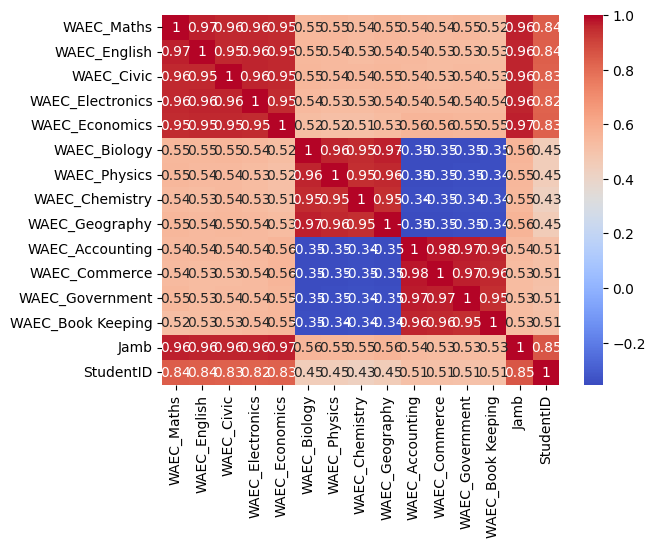

In [32]:
columns_of_interest = [
    'WAEC_Maths', 'WAEC_English', 'WAEC_Civic', 'WAEC_Electronics', 'WAEC_Economics', 
    'WAEC_Biology', 'WAEC_Physics', 'WAEC_Chemistry', 'WAEC_Geography', 
    'WAEC_Accounting', 'WAEC_Commerce', 'WAEC_Government', 'WAEC_Book Keeping', 'Jamb',
    'StudentID'
]

filtered_table = final_table[columns_of_interest]

correlation_matrix = filtered_table.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

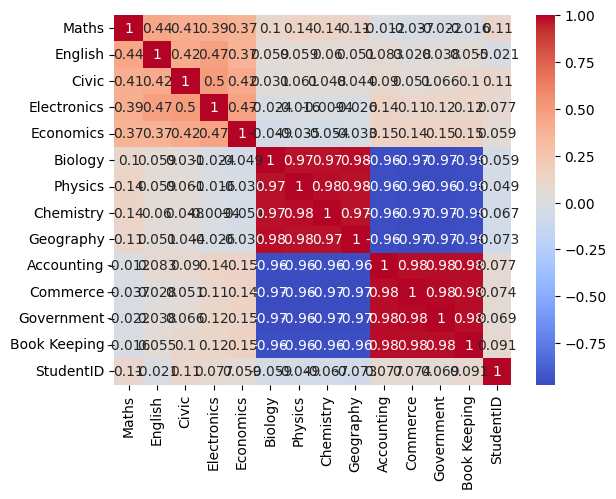

In [33]:
columns_of_interest = [
    'Maths', 'English', 'Civic', 'Electronics', 'Economics', 
    'Biology', 'Physics', 'Chemistry', 'Geography', 
    'Accounting', 'Commerce', 'Government', 'Book Keeping',
    'StudentID'
]

filtered_table = final_table[columns_of_interest]

correlation_matrix = filtered_table.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## The input features and target variables are separated from the final_table, preparing the data for modeling. With the use of train_test_split, distinct training and testing datasets are created, which is essential for assessing the model's predictive performance on unseen data.

In [34]:
final_table.drop(['StudentID', 'Classroom_id', 'Parent_id', 'ExtraCurricularActivityId', 'name',
                 'phone', 'WAECID', 'MockId'], axis=1, inplace=True)
final_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   185 non-null    int64  
 1   Age                      185 non-null    float64
 2   ExtraCurricularActivity  185 non-null    int64  
 3   WAEC_Maths               185 non-null    int64  
 4   WAEC_English             185 non-null    int64  
 5   WAEC_Civic               185 non-null    int64  
 6   WAEC_Electronics         185 non-null    int64  
 7   WAEC_Economics           185 non-null    int64  
 8   WAEC_Biology             185 non-null    int64  
 9   WAEC_Physics             185 non-null    int64  
 10  WAEC_Chemistry           185 non-null    int64  
 11  WAEC_Geography           185 non-null    int64  
 12  WAEC_Accounting          185 non-null    int64  
 13  WAEC_Commerce            185 non-null    int64  
 14  WAEC_Government          1

In [35]:
final_table.columns

Index(['gender', 'Age', 'ExtraCurricularActivity', 'WAEC_Maths',
       'WAEC_English', 'WAEC_Civic', 'WAEC_Electronics', 'WAEC_Economics',
       'WAEC_Biology', 'WAEC_Physics', 'WAEC_Chemistry', 'WAEC_Geography',
       'WAEC_Accounting', 'WAEC_Commerce', 'WAEC_Government',
       'WAEC_Book Keeping', 'Jamb', 'Maths', 'English', 'Civic', 'Electronics',
       'Economics', 'Biology', 'Physics', 'Chemistry', 'Geography',
       'Accounting', 'Commerce', 'Government', 'Book Keeping',
       'SupportingParent', 'HighestParentEducation', 'Family_Size'],
      dtype='object')

In [37]:
target_columns = [
    'WAEC_Maths',
       'WAEC_English', 'WAEC_Civic', 'WAEC_Electronics', 'WAEC_Economics',
       'WAEC_Biology', 'WAEC_Physics', 'WAEC_Chemistry', 'WAEC_Geography',
       'WAEC_Accounting', 'WAEC_Commerce', 'WAEC_Government',
       'WAEC_Book Keeping', 'Jamb',
]

X = final_table.drop(target_columns, axis=1)

Y = final_table[target_columns]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Initialisation and training of a multi-output regression model using the Random Forest algorithm to predict multiple target variables simultaneously.

In [38]:
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, Y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

## This code snippet evaluates the performance of a multi-output regression model by calculating and summarizing several performance metrics (MAE, MSE, RMSE, R², EVS, MAPE, and MBD). These metrics provide insights into the model's accuracy and reliability in predicting multiple target variables.

In [39]:
Y_pred = model.predict(X_test)

mae_list = []
mse_list = []
rmse_list = []
r2_list = []
evs_list = []
mape_list = []
mbd_list = []

for i in range(Y_test.shape[1]):
    y_true = Y_test.iloc[:, i]  
    y_pred = Y_pred[:, i]       
    
    mae_list.append(mean_absolute_error(y_true, y_pred))
    mse_list.append(mean_squared_error(y_true, y_pred))
    rmse_list.append(root_mean_squared_error(y_true, y_pred))
    r2_list.append(r2_score(y_true, y_pred))
    evs_list.append(explained_variance_score(y_true, y_pred))
    
    def mape(y_true, y_pred):
        mask = y_true != 0
        return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    
    mape_list.append(mape(y_true, y_pred))

    mbd_list.append(np.mean(y_pred - y_true))

print(f'Mean Absolute Error (average): {np.mean(mae_list)}')
print(f'Mean Squared Error (average): {np.mean(mse_list)}')
print(f'RMSE (average): {np.mean(rmse_list)}')
print(f'R-squared (average): {np.mean(r2_list)}')
print(f'Explained Variance Score (average): {np.mean(evs_list)}')
print(f'MAPE (average): {np.mean(mape_list)}%')
print(f'Mean Bias Deviation (average): {np.mean(mbd_list)}')

Mean Absolute Error (average): 18.044015444015447
Mean Squared Error (average): 879.6876644787644
RMSE (average): 25.69875459130828
R-squared (average): 0.47404017395407116
Explained Variance Score (average): 0.4938516734798997
MAPE (average): 35.27253888704886%
Mean Bias Deviation (average): 3.2622007722007718


## Performance Summary of the Multi-Output Regression Model
The evaluation metrics for the multi-output regression model are as follows:

- Mean Absolute Error (MAE): 18.00
    - On average, the model's predictions are off by approximately 18 units from the actual values.

- Mean Squared Error (MSE): 879.69
    - This metric indicates that the average squared difference between predicted and actual values is 879.69, reflecting the model's overall prediction error.

- Root Mean Squared Error (RMSE): 25.69
    - The RMSE provides a measure of how well the model performs in the same unit as the target variable. An average error of 7.08 units suggests that there is still room for improvement.

- R-squared (R²): 0.47
    - This value indicates that approximately 47% of the variance in the target variables is explained by the model.

- Explained Variance Score (EVS): 0.49
    - Similar to R², this score indicates how much of the variance in the data is accounted for by the model, suggesting average predictive capability.

- Mean Absolute Percentage Error (MAPE): 35.27%
    - The average percentage error in predictions is 35.27%, which may indicate a moderate level of accuracy depending on the context.

- Mean Bias Deviation (MBD): 3.26
    - This value indicates a slight positive bias in predictions, meaning that, on average, the model tends to slightly over-predict the values.

------------------------------------------------------------------------------------------------------------------------------------------------------
## The process below effectively optimizes the hyperparameters of a random forest model designed for multi-output regression, enhancing its predictive performance by utilizing randomized search with cross-validation.

In [40]:
param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [10, 20, 30, None],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__bootstrap': [True, False]
}

rf = MultiOutputRegressor(RandomForestRegressor(random_state=42))

random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, Y_train)

best_params = random_search.best_params_
print("Best parameters found: ", best_params)

cleaned_best_params = {key.replace('estimator__', ''): value for key, value in best_params.items()}

best_rf = MultiOutputRegressor(RandomForestRegressor(**cleaned_best_params, random_state=42))
best_rf.fit(X_train, Y_train)

Y_pred_optimized = best_rf.predict(X_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'estimator__n_estimators': 200, 'estimator__min_samples_split': 2, 'estimator__min_samples_leaf': 4, 'estimator__max_depth': 30, 'estimator__bootstrap': True}


## Summary of Randomized Search Results
1. Cross-Validation Setup:

   - The model underwent cross-validation with 3 folds for each of the 10 hyperparameter combinations specified in the parameter grid. This resulted in a total of 30 individual model fits.

2. Optimal Hyperparameters:

- The best hyperparameters identified from the search are as follows:
    - Number of Estimators (n_estimators): 100
    - Minimum Samples Required to Split an Internal Node (min_samples_split): 10
    - Minimum Samples Required at a Leaf Node (min_samples_leaf): 4
    - Maximum Depth of the Tree (max_depth): None (indicating unrestricted depth)
    - Bootstrap Samples Usage (bootstrap): False (indicating that the model was trained without bootstrapping)

--------------------------------------------------------------------------------------------------------------------------------------------------------
## The process below involves using 5-fold cross-validation to evaluate the optimized Random Forest model's performance by calculating the average Mean Absolute Error (MAE) across all folds, providing insight into its likely accuracy on unseen data.

In [41]:
cv_scores = cross_val_score(best_rf, X, Y, cv=5, scoring='neg_mean_absolute_error')

print("Cross-validated MAE: ", np.mean(np.abs(cv_scores)))

Cross-validated MAE:  21.055623200745366


### The cross-validated Mean Absolute Error (MAE) of approximately 21.06 indicates that, on average, the predictions made by the model deviate from the actual values by about 21.06 units across the different validation folds. This metric provides insight into the model's predictive accuracy, with lower values generally signifying better performance, as it quantifies the average magnitude of errors without considering their direction.

-----------------------------------------------------------------------------------------------------------------------------------------------
### The code below evaluates the performance of the optimized Random Forest model (best_rf) on the test dataset (X_test). It makes predictions (Y_pred_optimized) and calculates several regression metrics to assess model accuracy:

- **Mean Absolute Error (MAE)** quantifies the average absolute difference between actual and predicted values.
- **Mean Squared Error (MSE)** measures the average of the squared differences, penalizing larger errors more heavily.
- **Root Mean Squared Error (RMSE)** provides a measure of the error in the same units as the output variable, serving as a more interpretable metric than MSE.
- **R-squared** indicates the proportion of variance in the dependent variable that can be explained by the independent variables, with values closer to 1 signifying better fit.
- **Explained Variance Score (EVS)** assesses the proportion of the variance in the predicted values that is explained by the true values, similar to R-squared.
- **Mean Absolute Percentage Error (MAPE)** calculates the average absolute percentage error between actual and predicted values, providing insight into the relative accuracy of the predictions.

Finally, it prints these evaluation metrics, allowing for a comprehensive assessment of the model's performance on the test data.

In [43]:
Y_pred_optimized = best_rf.predict(X_test)

mae = mean_absolute_error(Y_test, Y_pred_optimized)
mse = mean_squared_error(Y_test, Y_pred_optimized)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred_optimized)
evs = explained_variance_score(Y_test, Y_pred_optimized)

def mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {evs}')
print(f'MAPE: {mape(Y_test.values, Y_pred_optimized)}%')

Mean Absolute Error: 18.326178419434708
Mean Squared Error: 871.0334614228065
RMSE: 29.51327601983227
R-squared: 0.4810742960949948
Explained Variance Score: 0.5059326666781045
MAPE: 36.62122967386996%


----------------------------------------------------------------------------------------------------------------------------------------------------
For the code below

1. Actual vs Predicted Plot helps visualize how well the predictions match the actual values. If most points are near the diagonal line, the model is performing well.

2. Residuals Plot:
Plotting the residuals helps understand if there are any patterns in the errors. Ideally, residuals should scatter randomly around 0 without any clear pattern, indicating that the model predictions are unbiased.

3. Distribution of Residuals:
The residual distribution should ideally follow a normal distribution (bell curve), indicating that the errors are evenly spread and don’t contain significant outliers.

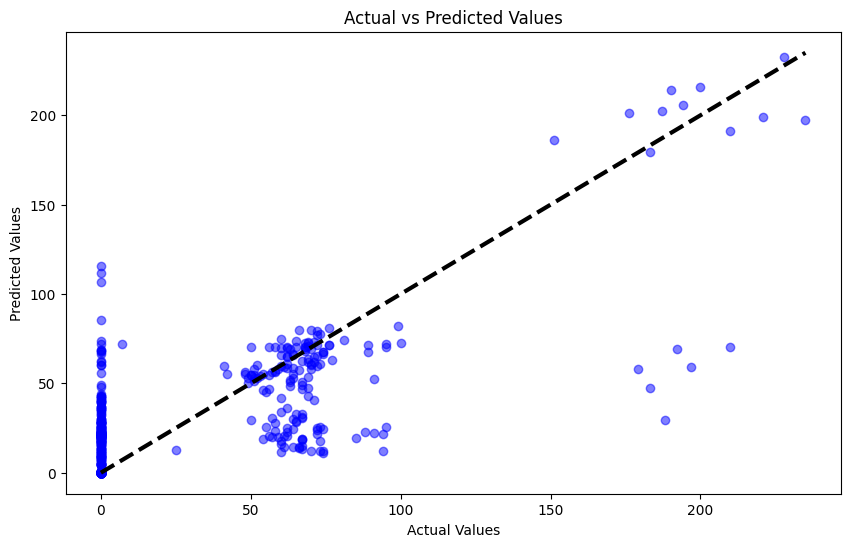

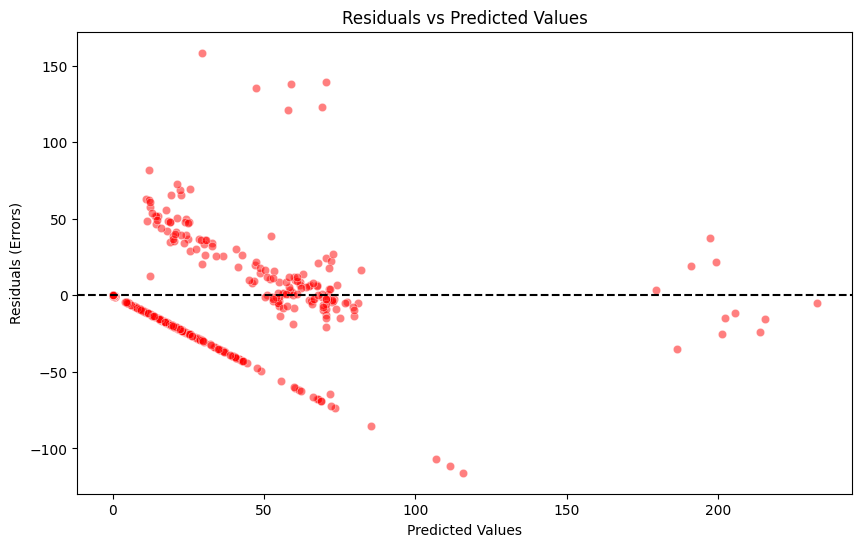

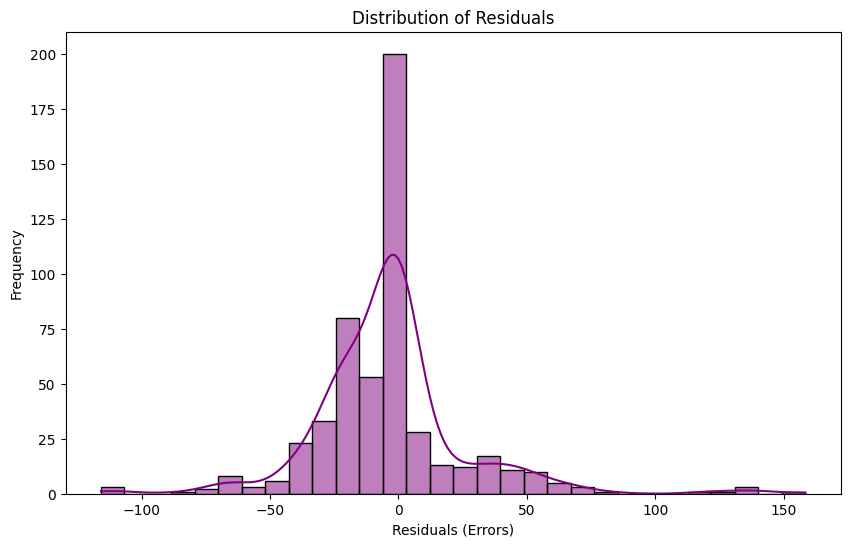

In [44]:
# 1. Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test.values.flatten(), Y_pred_optimized.flatten(), alpha=0.5, color='blue')
plt.plot([Y_test.values.min(), Y_test.values.max()], [Y_test.values.min(), Y_test.values.max()], 'k--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# 2. Residuals plot (errors between predicted and actual)
residuals = Y_test.values.flatten() - Y_pred_optimized.flatten()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_pred_optimized.flatten(), y=residuals, color='red', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Errors)')
plt.title('Residuals vs Predicted Values')
plt.show()

# 3. Distribution of residuals (error distribution)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.xlabel('Residuals (Errors)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

1. Actual vs. Predicted Plot:
 - Dots Clustered Around the Diagonal: This indicates that the model's predictions are generally close to the actual values.

2. Residuals Plot:
- Random Scatter Around Zero: The lack of patterns in the residuals suggests that the model does not systematically overpredict or underpredict. This randomness is a good sign, indicating that the model has captured the underlying relationships in the data well.

3. Distribution of Residuals:
- High Frequency at Zero Residuals: A peak around zero indicates that many of the predictions are very close to the actual values.

-----------------------------------------------------------------------------------------------------------------------------------------------
The essence of the code cell below are thus:

1. **Calculate Residuals**: It computes the residuals by subtracting the predicted values (Y_pred_optimized) from the actual values (Y_test), which represents the errors in the predictions.

2. **Calculate Absolute Residuals**: It then takes the absolute value of the residuals to analyze the magnitude of errors without regard to their direction.

3. **Define Outlier Threshold**: An outlier threshold is established as twice the standard deviation of the absolute residuals for each target variable. This threshold helps identify values that significantly deviate from the expected range.

4. **Identify Outliers**: It filters the test data (X_test) to find instances where any of the absolute residuals exceed the calculated threshold, indicating potential outliers.

5. **Count and Display Outliers**: Finally, it prints the number of identified outliers and displays the first few entries in the outliers dataset.

In [45]:
residuals = Y_test - Y_pred_optimized
absolute_residuals = np.abs(residuals)

outlier_threshold = 2 * absolute_residuals.std(axis=0)

outliers = X_test[(absolute_residuals > outlier_threshold).any(axis=1)]

print(f"Number of outliers: {len(outliers)}")
outliers.head()

Number of outliers: 14


,gender,Age,ExtraCurricularActivity,Maths,English,Civic,Electronics,Economics,Biology,Physics,Chemistry,Geography,Accounting,Commerce,Government,Book Keeping,SupportingParent,HighestParentEducation,Family_Size
42,1,16.2,1,57,68,64,58,63,70,73,71,71,0,0,0,0,2,1,5
111,1,15.9,2,61,68,71,54,54,64,72,72,58,0,0,0,0,0,0,5
117,1,16.6,1,73,67,67,68,57,64,61,60,70,0,0,0,0,1,3,6
97,1,16.1,2,58,73,65,67,70,57,63,52,64,0,0,0,0,0,2,4
163,1,17.0,1,70,70,94,68,71,0,0,0,0,67,70,64,94,0,1,3


The output **"Number of outliers: 14"** indicates that, among the predictions made by the model, 14 instances in the test dataset (X_test) have prediction errors (residuals) that exceed the defined outlier threshold. This suggests that these 14 predictions are significantly different from the actual values and may represent cases where the model's predictions were particularly poor or atypical.

In [48]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

joblib.dump(model, 'final_exam_model.pkl')
joblib.dump(scaler, 'final_exam_scaler.pkl')
print("Model and scaler saved successfully.")

Model and scaler saved successfully.


In [ ]:
# final_table.to_csv('final_student_data.csv', index=False)

# print("Final table saved as 'final_student_data.csv'")